# Human Activity Recognition From Accelerometer CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Loading our Dataset

In [4]:
#pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')

In [5]:
file = open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList=[]

for i,line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp=[line[0],line[1],line[2],line[3],line[4],last]
        processedList.append(temp)
    except:
        print('Error at line number:',i)

Error at line number: 281873
Error at line number: 281874
Error at line number: 281875


In [6]:
processedList[:10]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621']]

In [7]:
colums =['user','activity','time','x','y','z']

In [8]:
data = pd.DataFrame(data=processedList,columns=colums)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [9]:
data.shape

(343416, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [11]:
data.isnull()

,user,activity,time,x,y,z
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
343411,False,False,False,False,False,False
343412,False,False,False,False,False,False
343413,False,False,False,False,False,False
343414,False,False,False,False,False,False


In [12]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

## Balance this data

In [13]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
data['z']=data['z'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [15]:
activities =data['activity'].value_counts().index

In [16]:
Fs=20

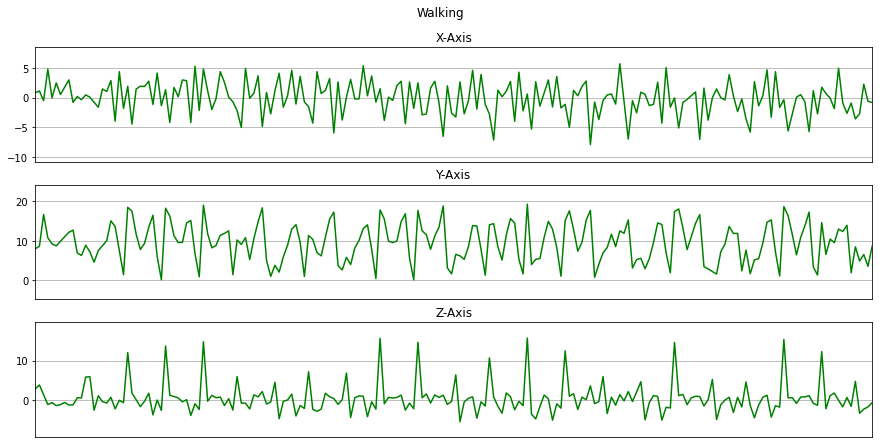

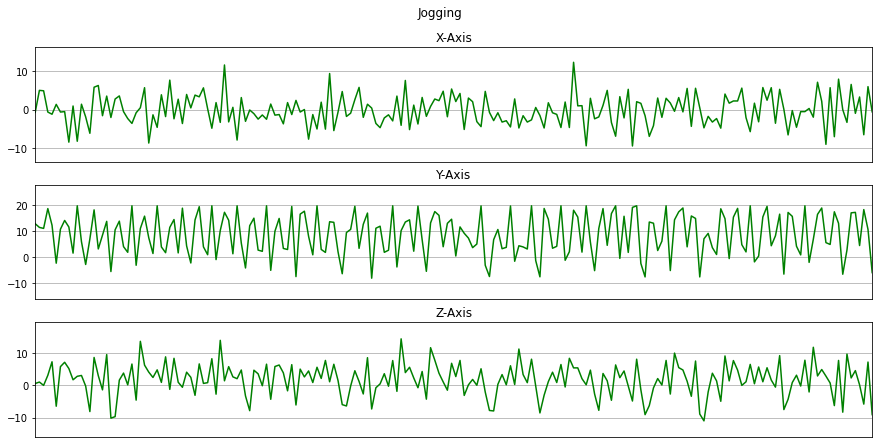

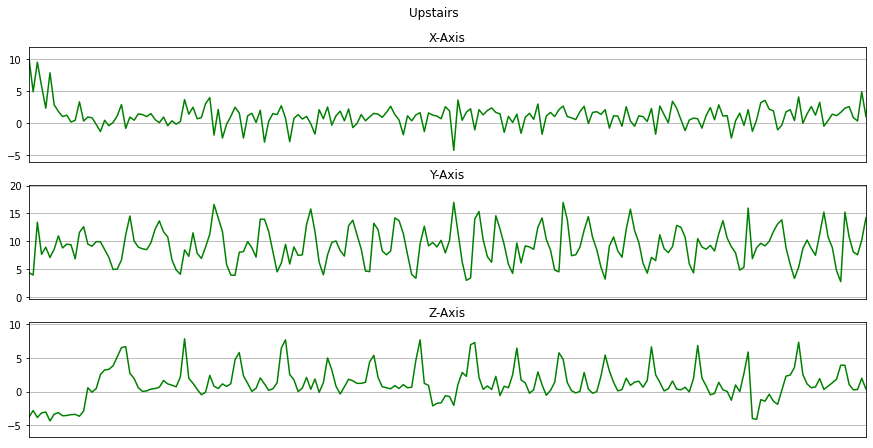

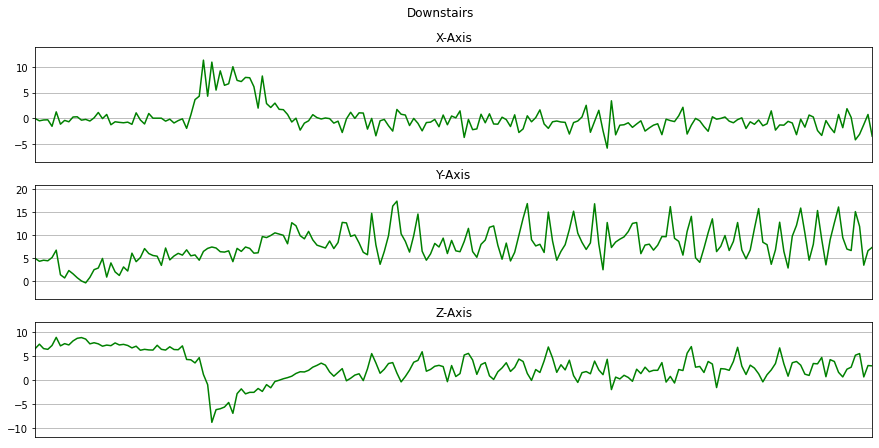

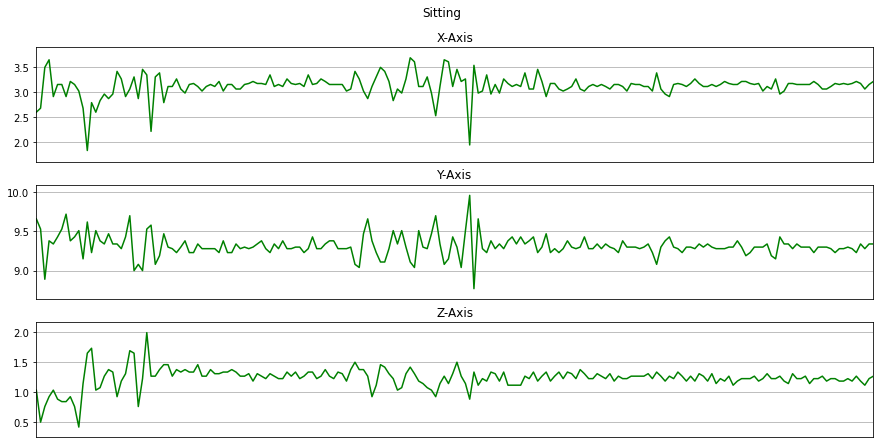

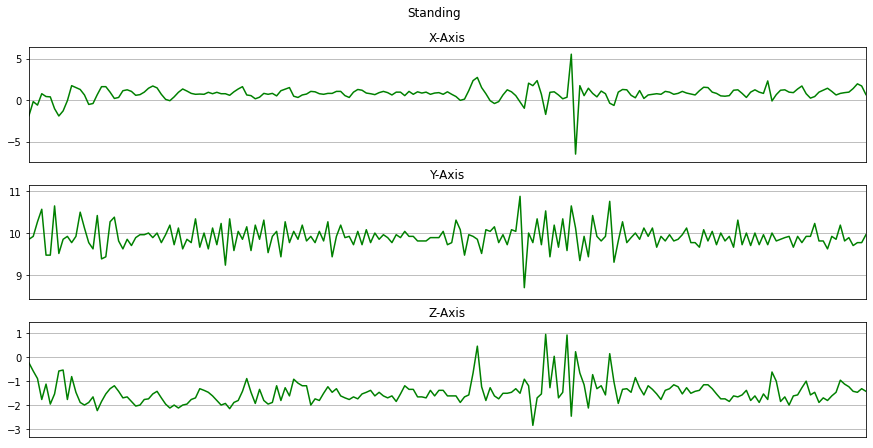

In [17]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15,7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax,x,y, title):
    ax.plot(x,y,'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity']==activity)][:Fs*10]
    plot_activity(activity,data_for_plot)

In [18]:
df= data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [19]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [20]:
Walking =df[df['activity']=='Walking'].head(3555).copy()
Jogging =df[df['activity']=='Jogging'].head(3555).copy()            
Upstairs  =df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs=df[df['activity']=='Downstairs'].head(3555).copy()
Sitting =df[df['activity']=='Sitting'].head(3555).copy()
Standing  =df[df['activity']=='Standing'].head(3555).copy()            

In [21]:
balanced_data=pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [22]:
balanced_data['activity'].value_counts()

Walking       3555
Standing      3555
Downstairs    3555
Upstairs      3555
Jogging       3555
Sitting       3555
Name: activity, dtype: int64

In [23]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label = LabelEncoder()
balanced_data['label']= label.fit_transform(balanced_data['activity'])

In [26]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## Standardizing Data

In [27]:
x= balanced_data[['x','y','z']]
y= balanced_data['label']

In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label']=y.values
scaled_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


## Frame Preparation

In [29]:
import scipy.stats as stats

In [30]:
Fs=20
frame_size = Fs*4 #80
hop_size = Fs*2

In [31]:
def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    
    frames =[]
    labels =[]
    for i in range(0, len(df)-frame_size, hop_size):
        x= df['x'].values[i: i+frame_size]
        y= df['y'].values[i: i+frame_size]
        z= df['z'].values[i: i+frame_size]
        
        #Retrive the most often used Label in this segment
        label = stats.mode(df['label'][i: i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [32]:
x,y = get_frames(scaled_x, frame_size, hop_size)

In [33]:
x.shape, y.shape

((532, 80, 3), (532,))

In [34]:
3555/532

6.682330827067669

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

In [36]:
x_train.shape, x_test.shape

((425, 80, 3), (107, 80, 3))

In [37]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

In [38]:
x_train = x_train.reshape(425,80,3,1)
x_test = x_test.reshape(107, 80, 3,1)

## 2d CNN Model

In [40]:
model = Sequential()
model.add(Conv2D(16, (2,2), activation='relu',input_shape=x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2,2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2496)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                159808    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [43]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
14/14 [==============================] - 0s 24ms/step - loss: 1.6423 - accuracy: 0.2471 - val_loss: 1.3558 - val_accuracy: 0.4486
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 1.2548 - accuracy: 0.4871 - val_loss: 0.9932 - val_accuracy: 0.7477
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.9743 - accuracy: 0.6541 - val_loss: 0.7040 - val_accuracy: 0.8131
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.7529 - val_loss: 0.5126 - val_accuracy: 0.8505
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.8000 - val_loss: 0.3745 - val_accuracy: 0.8598
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8706 - val_loss: 0.2872 - val_accuracy: 0.8879
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8918 - val_loss: 0.2513 - val_accuracy: 0.9065
Epoch 8/10
14/14 [=

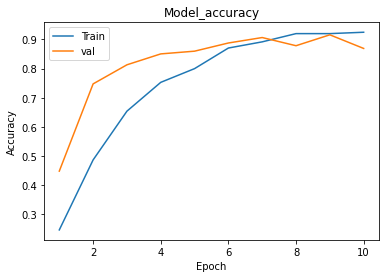

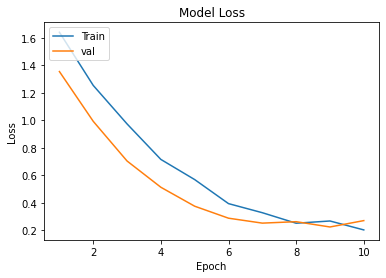

In [44]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history, 10)

## Confusion Matrix

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

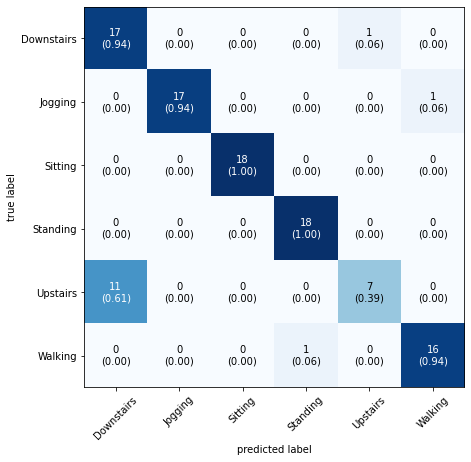

In [48]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))